In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Having cleaned the data, it is now time to analyze it to gain insight and understand its characteristics. But before we do that, we have to split the data into training and test. Afterward, we analyze the training data in order to better understand the dataset by examining its various features, distributions, and patterns. In order to accomplish this, please follow the steps below and answer the questions.

1. Open the previous challenge notebook.

2. Separate the features (X) and label (y).

3. Split the dataframe into training and test data

4. Recombine the train features (X_train) and label (y_train) in one dataframe. As we analyze training data, we need to combine them into one datafra

5. Answer the following questions:

+ How does the car price distribution look?
+ What is the effect of engine horsepower on car price?
+ What are the top 5 most expensive car brands?
+ What are the top 5 most popular car brands?
+ How does the price distribution look for the top 5 most popular car brands?
+ What is the count of cars with different numbers of doors according to less than and more than 4 cylinders?
+ How does the average price change per year?

**1.** Open the previous challenge notebook.

In [2]:
df = pd.read_csv('./data/data_no_dupes_null.csv')
df.head()

,make,model,year,fuel,hp,cylinders,transmission,drive,doors,mrk_cat,size,style,highway_mpg,city_mpg,popularity,price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.columns

Index(['make', 'model', 'year', 'fuel', 'hp', 'cylinders', 'transmission',
       'drive', 'doors', 'mrk_cat', 'size', 'style', 'highway_mpg', 'city_mpg',
       'popularity', 'price'],
      dtype='object')

In [4]:
df.shape

(7735, 16)

**2.** Separate the features (X) and label (y).

In [5]:
# features
X = df[['make', 'model', 'year', 'fuel', 'hp', 'cylinders', 'transmission',
       'drive', 'doors', 'mrk_cat', 'size', 'style', 'highway_mpg', 'city_mpg',
       'popularity']]

# target
y = df['price']

**3.** Split the dataframe into training and test data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
Xtrain, Xtest, ytrain, ytest = \
train_test_split(X, y, test_size=0.2,random_state=42)

In [8]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((6188, 15), (1547, 15), (6188,), (1547,))

In [9]:
Xtrain.head()

,make,model,year,fuel,hp,cylinders,transmission,drive,doors,mrk_cat,size,style,highway_mpg,city_mpg,popularity
4560,Lincoln,MKC,2017,regular unleaded,240.0,4.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Compact,4dr SUV,28,21,61
1226,Toyota,Avalon Hybrid,2016,regular unleaded,200.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,39,40,2031
3617,Dodge,Grand Caravan,2015,flex-fuel (unleaded/E85),283.0,6.0,AUTOMATIC,front wheel drive,4.0,Flex Fuel,Midsize,Passenger Minivan,25,17,1851
3409,Lamborghini,Gallardo,2014,premium unleaded (required),570.0,10.0,MANUAL,all wheel drive,2.0,"Exotic,Factory Tuner,High-Performance",Compact,Coupe,20,13,1158
1512,Mercedes-Benz,C43 AMG,1999,regular unleaded,302.0,8.0,AUTOMATIC,rear wheel drive,4.0,"Factory Tuner,Luxury,Performance",Compact,Sedan,21,16,617


**4.** Recombine the train features (X_train) and label (y_train) in one dataframe. As we analyze training data, we need to combine them into one datafra

In [102]:
df_train = pd.concat([Xtrain, ytrain], axis=1)
df_train.shape

(6188, 16)

**5.** Answer the following questions:

How does the car price distribution look?

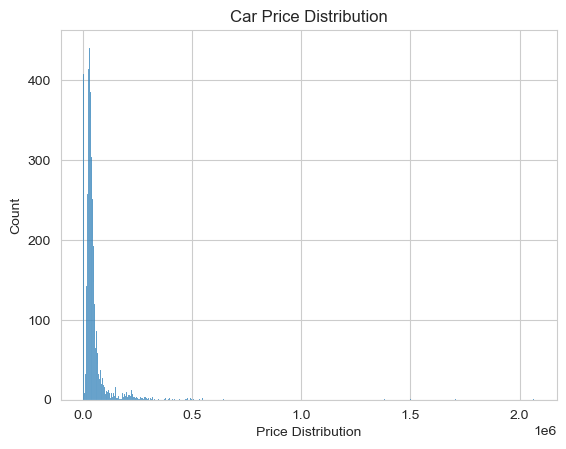

In [11]:
#plt.figure(figsize=(10,6),layout='constrained')
sns.set_style('whitegrid')
plt.xlabel('Price Distribution')
#plt.axis([0, 86, 0, 30])

sns.histplot(
    data=df_train,
    x='price',
    stat='count').set(title='Car Price Distribution');

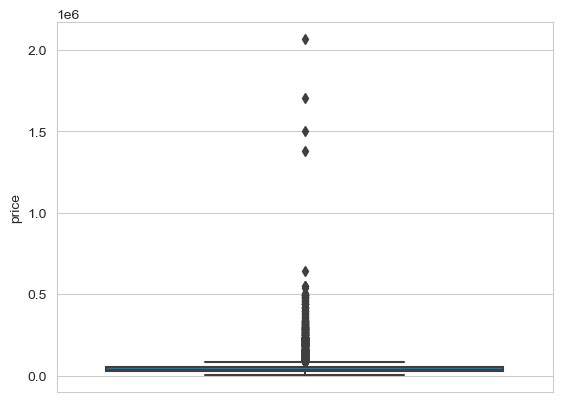

In [12]:
sns.boxplot(
    data=df_train,
    y='price');

In [13]:
df_train[['price']].describe()

,price
count,6.188000e+03
mean,5.107678e+04
std,7.071165e+04
min,2.000000e+03
25%,2.627500e+04
50%,3.563750e+04
75%,4.962125e+04
max,2.065902e+06


**5.** Answer the following questions:

What is the effect of engine horsepower on car price?

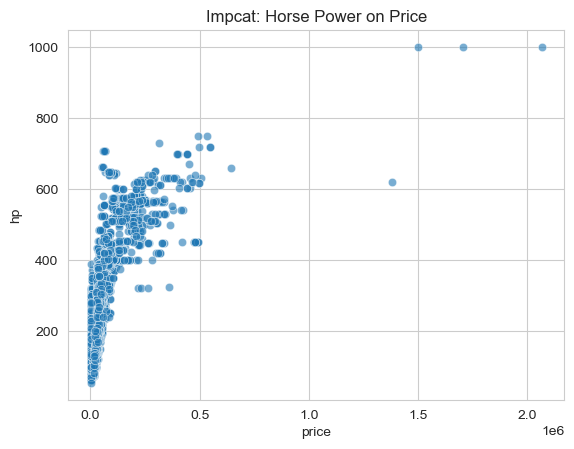

In [14]:
sns.scatterplot(data=df_train, 
                x='price',
                y='hp',
                alpha = 0.6).set(title='Impcat: Horse Power on Price');

In [15]:
price_hp = ['price', 'hp']
hp_price = df_train[price_hp]
hp_corr = hp_price.corr()

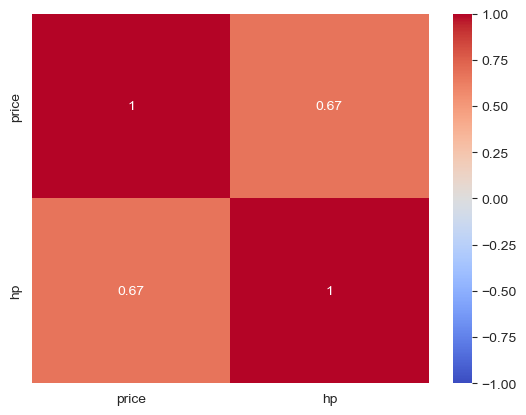

In [16]:
sns.heatmap(hp_corr,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=+1
           );

**5.** Answer the following questions:

What are the top 5 most expensive car brands?

In [17]:
# group the brands and make a DF of their mean price. reset index so that make is it's own column
brand_avg = df_train.groupby('make')[['price']].mean().reset_index()

# sort this DF by price, decending (most to least expensive)
brand_avg.sort_values(by="price",ascending=False,ignore_index=True,inplace=True)

# output only the first five
price_5 = brand_avg.head(5)['make']
price_5

0        Bugatti
1        Maybach
2    Rolls-Royce
3    Lamborghini
4        Bentley
Name: make, dtype: object

**5.** Answer the following questions:

What are the top 5 most popular car brands?

In [20]:
df_pop_5 = df_train.groupby('make').count().reset_index().sort_values(by="model",ascending=False,ignore_index=True).head(5)

pop_5 = df_pop_5['make']
pop_5

0     Chevrolet
1          Ford
2    Volkswagen
3      Cadillac
4          Audi
Name: make, dtype: object

**5.** Answer the following questions:

How does the price distribution look for the top 5 most popular car brands?

In [24]:
pop5_df = df_train[df_train['make'].isin(pop_5)]
pop5_plt_df = pop5_df.groupby('make')[['price']].mean().reset_index()
pop5_plt_df

,make,price
0,Audi,54985.390152
1,Cadillac,57157.236066
2,Chevrolet,35699.907598
3,Ford,34027.768844
4,Volkswagen,30874.550898


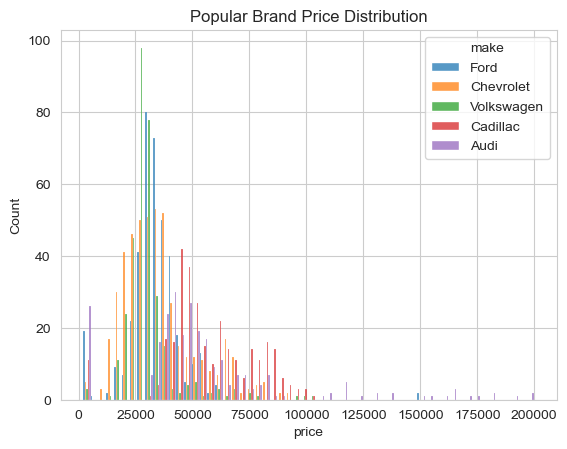

In [26]:
sns.histplot(
    data=pop5_df,
    x='price',
    stat='count',
    hue='make', 
    multiple='dodge'
).set(title='Popular Brand Price Distribution');

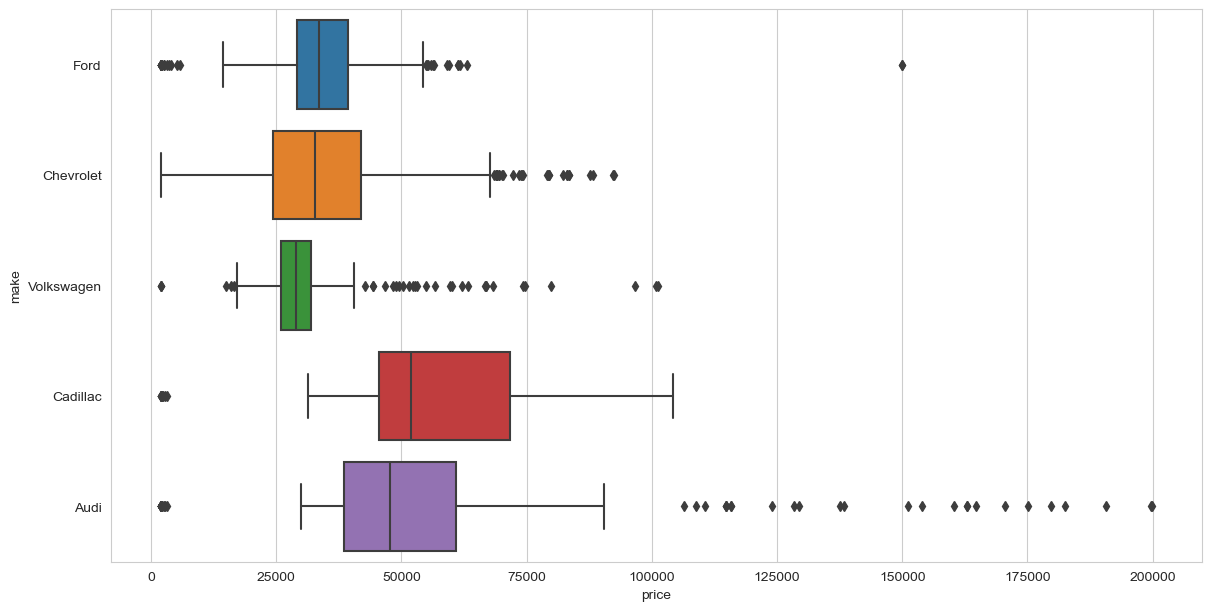

In [34]:
plt.figure(figsize=(12,6),layout='constrained')
sns.set_style('whitegrid')

sns.boxplot(
    data=pop5_df,
    x='price',
    y='make');

**5.** Answer the following questions:

What is the count of cars with different numbers of doors according to less than and more than 4 cylinders?

In [83]:
test=df_train.groupby(['cylinders','doors']).count()
test

make  model  year  fuel    hp  transmission  drive  mrk_cat  \
cylinders doors                                                                
0.0       4.0       8      8     8     8     8             8      8        8   
3.0       2.0       6      6     6     6     6             6      6        6   
          4.0      15     15    15    15    15            15     15       15   
4.0       2.0     527    527   527   527   527           527    527      527   
          3.0      24     24    24    24    24            24     24       24   
          4.0    1760   1760  1760  1760  1760          1760   1760     1760   
5.0       2.0      17     17    17    17    17            17     17       17   
          4.0      83     83    83    83    83            83     83       83   
6.0       2.0     603    603   603   603   603           603    603      603   
          3.0      45     45    45    45    45            45     45       45   
          4.0    1629   1629  1629  1629  1629          1629   1629     1629   
8.0       2.0     392    392   392   392   392           392    392      392   
          3.0      65     65    65    65    65            65     65       65   
          4.0     787    787   787   787   787           787    787      787   
10.0      2.0      52     52    52    52    52            52     52       52   
          4.0       1      1     1     1     1             1      1        1   
12.0      2.0     118    118   118   118   118           118    118      118   
          4.0      53     53    53    53    53            53     53       53   
16.0      2.0       3      3     3     3     3             3      3        3   

                 size  style  highway_mpg  city_mpg  popularity  price  
cylinders doors                                                         
0.0       4.0       8      8            8         8           8      8  
3.0       2.0       6      6            6         6           6      6  
          4.0      15     15           15        15          15     15  
4.0       2.0     527    527          527       527         527    527  
          3.0      24     24           24        24          24     24  
          4.0    1760   1760         1760      1760        1760   1760  
5.0       2.0      17     17           17        17          17     17  
          4.0      83     83           83        83          83     83  
6.0       2.0     603    603          603       603         603    603  
          3.0      45     45           45        45          45     45  
          4.0    1629   1629         1629      1629        1629   1629  
8.0       2.0     392    392          392       392         392    392  
          3.0      65     65           65        65          65     65  
          4.0     787    787          787       787         787    787  
10.0      2.0      52     52           52        52          52     52  
          4.0       1      1            1         1           1      1  
12.0      2.0     118    118          118       118         118    118  
          4.0      53     53           53        53          53     53  
16.0      2.0       3      3            3         3           3      3

In [99]:
less4_cyl = df_train[df_train['cylinders']<4].groupby('doors')
less4_cyl['make'].count()

doors
2.0     6
4.0    23
Name: make, dtype: int64

In [100]:
more4_cyl = df_train[df_train['cylinders']>4].groupby('doors')
more4_cyl['make'].count()

doors
2.0    1185
3.0     110
4.0    2553
Name: make, dtype: int64

**5.** Answer the following questions:

How does the average price change per year?

In [40]:
yrly_price = df_train.groupby('year')[['price']].mean().reset_index()
yrly_price

,year,price
0,1990,2080.161290
1,1991,2247.487179
2,1992,2168.274510
3,1993,2424.423729
4,1994,2905.255814
5,1995,3337.714286
6,1996,3232.743590
7,1997,4131.804348
8,1998,4959.434783
9,1999,3663.861111


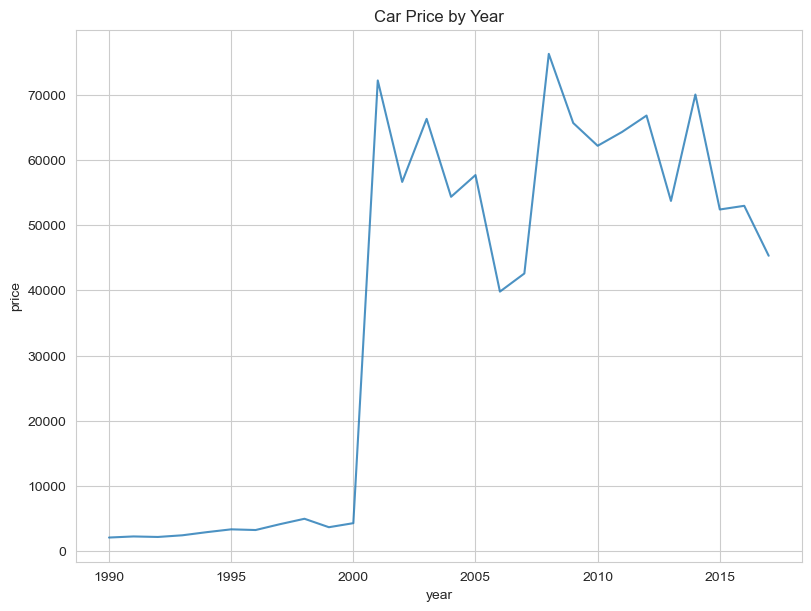

In [68]:
plt.figure(figsize=(8,6),layout='constrained')
sns.set_style('whitegrid')

sns.lineplot(data=yrly_price, 
                x='year',
                y='price',
                alpha = 0.8).set(title='Car Price by Year');